# Reference: [Python for Algorithmic Trading (Yves Hilpisch, pp.88-98)](oreilly.com/library/view/python-for-algorithmic/9781492053347/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

# Strategies Based on Simple Moving Averages (SMA's)

## Reading the data

In [2]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()
raw

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.1000,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,284.270000,157.380,59.41,1789.21,229.91,321.23,3223.38,12.67,1.1087,1498.8100,28.66,141.27
2019-12-26,289.910000,158.670,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.800000,158.960,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


## Slow & Fast Moving Average

In [4]:
data = raw[['EUR=']].rename(columns={'EUR=': 'price'})
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


<AxesSubplot:title={'center':'EUR/USD | 42 & 252 days SMAs'}, xlabel='Date'>

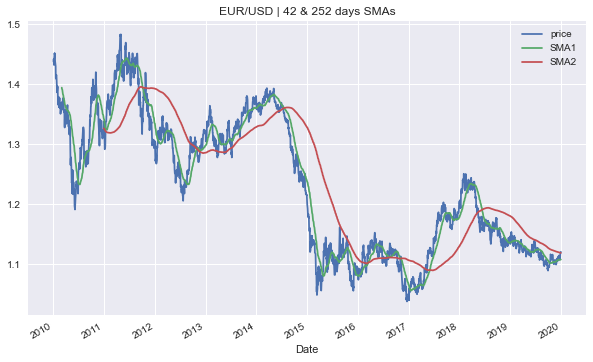

In [5]:
plt.style.use('seaborn')

data.plot(title='EUR/USD | 42 & 252 days SMAs', figsize=(10, 6))

## Position

Go long when the fast moving average is above the slower moving average and vice versa.

In [6]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data = data.dropna()
data

,price,SMA1,SMA2,position
Date,,,,
2010-12-31,1.3377,1.342579,1.326218,1
2011-01-03,1.3351,1.340945,1.325798,1
2011-01-04,1.3301,1.338940,1.325374,1
2011-01-05,1.3151,1.336448,1.324874,1
2011-01-06,1.3001,1.333995,1.324351,1
...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1
2019-12-26,1.1096,1.107740,1.119529,-1
2019-12-27,1.1175,1.107924,1.119428,-1


<AxesSubplot:title={'center':'Market Positioning'}, xlabel='Date'>

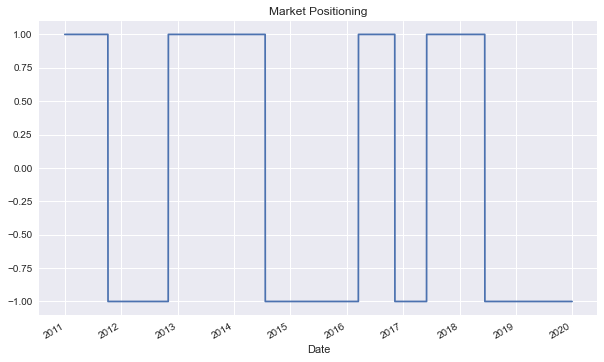

In [7]:
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(10, 6))


## Calculate returns

Calculate the log returns over the original financial data

<AxesSubplot:>

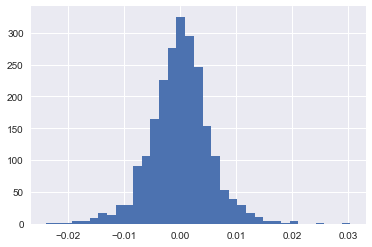

In [8]:
data['returns'] = np.log(data['price'] / data['price'].shift())
data['returns'].hist(bins=35)

For strategy returns, multiply the `position` (shifted by 1 trading day) with the `returns` column

In [9]:
data['strategy'] = data['returns'] * data['position'].shift()

data[['strategy', 'returns']].sum()

strategy    0.253121
returns    -0.176731
dtype: float64

In [10]:
data[['strategy', 'returns']].sum().apply(np.exp)

strategy    1.288039
returns     0.838006
dtype: float64

<AxesSubplot:xlabel='Date'>

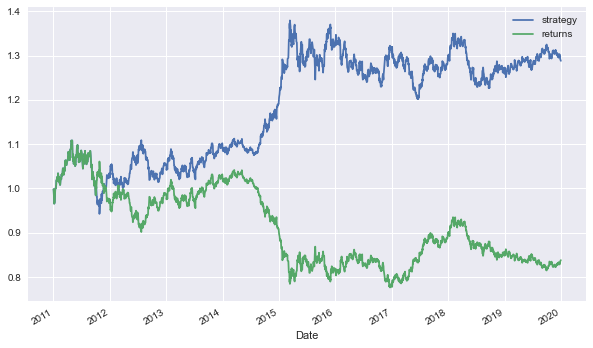

In [11]:
data[['strategy', 'returns']].cumsum().apply(np.exp).plot(figsize=(10, 6))

### Annualised risk-returns

**Annualised mean returns**

In [12]:
# Regular
data[['strategy', 'returns']].mean() * 252

strategy    0.028174
returns    -0.019671
dtype: float64

In [13]:
# Log
np.exp(data[['strategy', 'returns']].mean() * 252) - 1

strategy    0.028575
returns    -0.019479
dtype: float64

**Annualised standard deviation**

In [14]:
(data[['strategy', 'returns']].std() * 252 ** 0.5)

strategy    0.085405
returns     0.085414
dtype: float64

In [15]:
(data[['strategy', 'returns']].apply(np.exp) - 1).std() * 252 ** 0.5

strategy    0.085373
returns     0.085405
dtype: float64

**Cumulative maximum performance**

<AxesSubplot:title={'center':'Gross performance and cumulative maximum performance'}, xlabel='Date'>

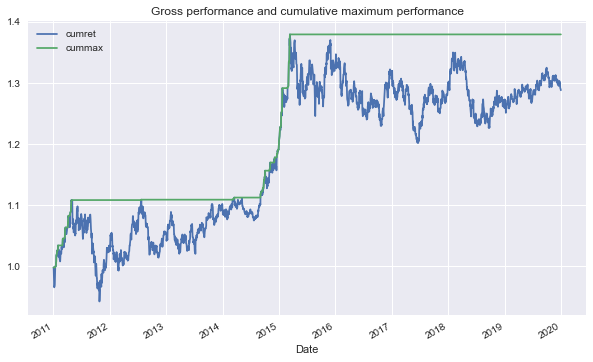

In [16]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)
data['cummax'] = data['cumret'].cummax()

data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6), title='Gross performance and cumulative maximum performance')

**Maximum drawdown**

In [17]:
drawdown = data['cummax'] - data['cumret']
drawdown.max()

0.17779367070195895

**Longest drawdown period**

In [18]:
temp = drawdown[drawdown == 0]
temp.reset_index()['Date'].diff().max()

Timedelta('596 days 00:00:00')